In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("raw data.csv")
df = df.drop(["ID"],axis=1)
print(len(df))
print(df.head())

460300
   CELL_ID  DAYS  HOURS  SEQ  MOVE  TOTAL  HDB  PRIVATE  COMM      INDU  ...  \
0      252    30      9  105     0      1  0.0      0.0   0.0  0.468283  ...   
1      252    30     10  106     0      1  0.0      0.0   0.0  0.468283  ...   
2      252    30     11  107     0      1  0.0      0.0   0.0  0.468283  ...   
3      252    30     12  108     0      1  0.0      0.0   0.0  0.468283  ...   
4      252    30     13  109     1      1  0.0      0.0   0.0  0.468283  ...   

       RAIN      TEMPO  LABORFREE  WENDFREE        xmin        xmax  \
0  0.000000  29.379754          0         1  24238.0038  24538.0039   
1  0.004401  30.148660          0         1  24238.0038  24538.0039   
2  0.000000  31.057488          0         1  24238.0038  24538.0039   
3  0.000000  31.751709          0         1  24238.0038  24538.0039   
4  0.000000  32.433409          0         1  24238.0038  24538.0039   

         ymin        ymax          Longitude         Latitude  
0  49656.3341  49956.

## data checking

In [3]:
df.describe()

,CELL_ID,DAYS,HOURS,SEQ,MOVE,TOTAL,HDB,PRIVATE,COMM,INDU,...,MRTDIST,DISTCEN,RAIN,TEMPO,LABORFREE,WENDFREE,xmin,xmax,ymin,ymax
count,460300.000000,460300.000000,460300.000000,460300.000000,460300.000000,460300.000000,460300.000000,460300.000000,460300.000000,460300.000000,...,460300.000000,460300.000000,460300.000000,460300.000000,460300.000000,460300.000000,460300.000000,460300.000000,460300.000000,460300.000000
mean,7715.839437,16.307441,11.446472,109.547971,0.198332,4.241475,0.522246,0.207878,0.102025,0.099660,...,1455.813170,13245.649621,0.283546,28.321791,0.116711,0.225620,28830.888016,29130.888116,37242.113581,37542.113681
std,3048.448090,12.814637,6.878263,61.298243,0.589233,4.960907,0.701851,0.386844,0.320090,0.338202,...,1067.400596,5925.608191,1.042254,1.637828,0.321076,0.417991,8100.077515,8100.077515,5078.064119,5078.064119
min,252.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,23.777551,120.653373,0.000000,23.504696,0.000000,0.000000,5337.997500,5637.997600,24756.325800,25056.325900
25%,5818.000000,3.000000,5.000000,57.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,754.827774,8644.076166,0.000000,27.251949,0.000000,0.000000,22738.003300,23038.003400,33456.328700,33756.328800
50%,8137.000000,26.000000,11.000000,111.000000,0.000000,3.000000,0.116007,0.000000,0.000000,0.000000,...,1255.900127,13528.596450,0.000000,28.202213,0.000000,0.000000,29338.005500,29638.005600,36456.329700,36756.329800
75%,9995.000000,28.000000,17.000000,163.000000,0.000000,5.000000,0.933032,0.258471,0.035443,0.000000,...,1869.693975,17984.259060,0.053465,29.397096,0.000000,0.000000,34738.007300,35038.007400,40356.331000,40656.331100
max,15202.000000,30.000000,23.000000,215.000000,17.000000,91.000000,6.702934,3.861086,4.560367,4.772794,...,14699.574950,28326.171060,41.635750,33.917333,1.000000,1.000000,49438.012200,49738.012300,49656.334100,49956.334200


In [4]:
df['DAYS'].value_counts()

3     53998
1     53722
2     53721
30    52467
29    51386
28    49996
4     49992
27    48629
26    46389
Name: DAYS, dtype: int64

number of regions: 3298


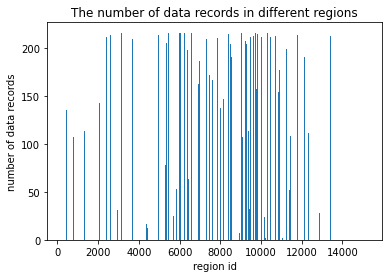

In [5]:
cell = df['CELL_ID'].unique().tolist()
cell.sort()
print("number of regions:",len(cell))
cnt_cell = []
for i in range(len(cell)):
    cnt_cell.append(len(df[df['CELL_ID']==cell[i]]))
plt.bar(cell,cnt_cell)
plt.xlabel("region id")
plt.ylabel("number of data records")
plt.title("The number of data records in different regions")
plt.savefig("The number of data records in different regions")

## feature engineering

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr

In [7]:
# the relationship between MOVE and TOTAL

data1 = df["MOVE"]
data2 = df["TOTAL"]
corr,p = pearsonr(data1,data2)
print("corr: %f" %corr,"p-value: %f" %p)

corr: 0.311905 p-value: 0.000000


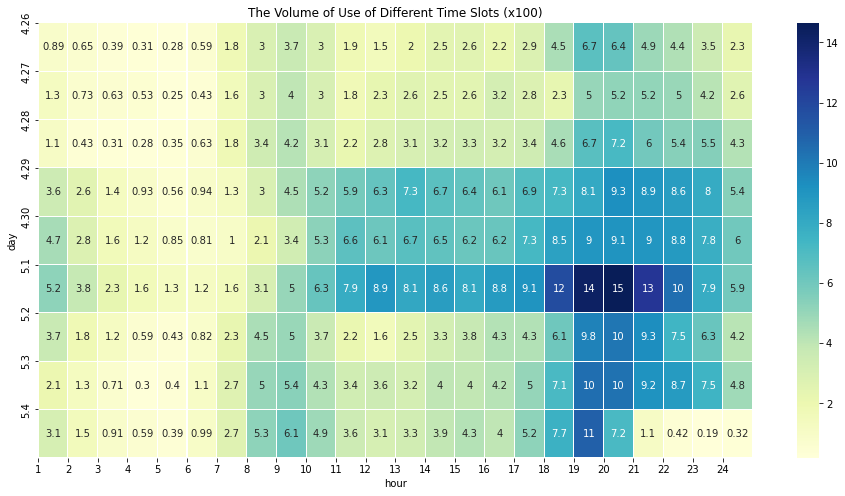

In [8]:
# The Volume of Use of Different Time Slots

seq_mv_sum = df.groupby("SEQ")["MOVE"].sum()
# seq_mv_count =  df.groupby("SEQ")["MOVE"].count()
# seq_mv = seq_mv_sum/seq_mv_count*max(seq_mv_count)
# print("the volumn of use of different time slots:",seq_mv_sum)

mv_sum = np.array(seq_mv_sum).reshape(9,24)
# print(mv_sum)

f, ax = plt.subplots(figsize = (16,8))
sns.heatmap(mv_sum/100, cmap = 'YlGnBu' , linewidths = 0.05, ax = ax,annot=True)   
ax.set_title('The Volume of Use of Different Time Slots (x100)')
ax.set_xlabel('hour')
ax.set_ylabel('day')
plt.xticks(range(0,24),range(1,25))
plt.yticks(range(0,9),['4.26','4.27','4.28','4.29','4.30','5.1','5.2','5.3','5.4'])
plt.savefig("The Volume of Use of Different Time Slots (x100)")

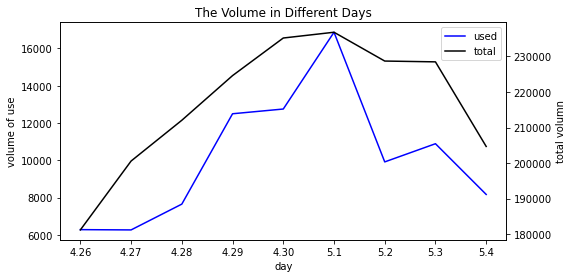

In [9]:
# The Volume in Different Days

seq_tt_sum = df.groupby("SEQ")["TOTAL"].sum()
tt_sum = np.array(seq_tt_sum).reshape(9,24)
day_tt_sum = []
for i in range(len(tt_sum)):
    day_tt_sum.append(sum(tt_sum[i]))

day_mv_sum = []
for i in range(len(mv_sum)):
    day_mv_sum.append(sum(mv_sum[i]))
    
x = ['4.26','4.27','4.28','4.29','4.30','5.1','5.2','5.3','5.4']

fig, ax1 = plt.subplots(figsize = (8,4)) 
ax1.plot(x, day_mv_sum, color="blue", label="used")
ax1.set_xlabel("day")
ax1.set_ylabel("volume of use")
ax2 = ax1.twinx()
ax2.plot(x, day_tt_sum, color="black", label="total")
ax2.set_ylabel("total volumn")
plt.title("The Volume in Different Days")
fig.legend(loc="upper right", bbox_to_anchor=(1, 1), bbox_transform=ax1.transAxes)
plt.savefig("The Volume in Different Days")

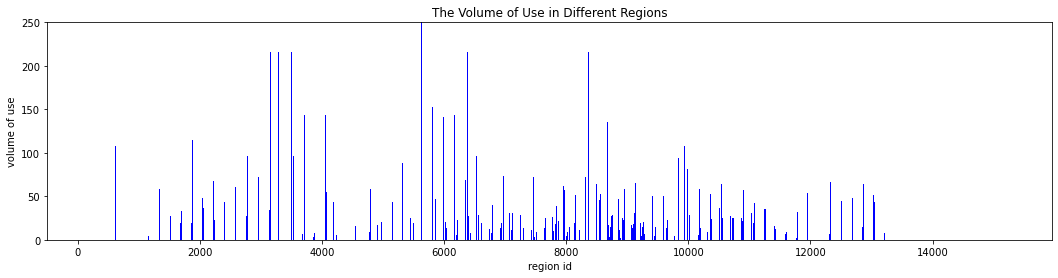

In [12]:
# The Volume of Use in Different Regions

cell_mv_sum = df.groupby("CELL_ID")["MOVE"].sum()
cell_mv_count = df.groupby("CELL_ID")["MOVE"].count()
cell_mv = cell_mv_sum/cell_mv_count*max(cell_mv_count)

# cell_tt_sum = df.groupby("CELL_ID")["TOTAL"].sum()
# cell_tt_count = df.groupby("CELL_ID")["TOTAL"].count()
# cell_tt = cell_tt_sum/cell_tt_count*max(cell_tt_count)

f, ax = plt.subplots(figsize = (18,4))
plt.bar(df["CELL_ID"].unique(), cell_mv, color="blue", label="used")
plt.xlabel("region id")
plt.ylabel("volume of use")
plt.ylim(ymax = 250)
plt.title("The Volume of Use in Different Regions")
plt.savefig("The Volume of Use in Different Regions")
plt.show()

# plt.plot(x, cell_tt, color="black", label="total")
# plt.xlabel("region id")
# plt.ylabel("total volumn")
# plt.title("The Total Volumn in Different Regions")
# plt.ylim(ymax = 10000)
# plt.show()

## clustering

In [11]:
from pyclustering.cluster.kmedians import kmedians
from pyclustering.cluster import cluster_visualizer

In [12]:
df["x"] = df.apply(lambda row: (row["xmin"]+row["xmax"])/2, axis=1)
df["y"] = df.apply(lambda row: (row["ymin"]+row["ymax"])/2, axis=1)
print(df.head())

   CELL_ID  DAYS  HOURS  SEQ  MOVE  TOTAL  HDB  PRIVATE  COMM      INDU  ...  \
0      252    30      9  105     0      1  0.0      0.0   0.0  0.468283  ...   
1      252    30     10  106     0      1  0.0      0.0   0.0  0.468283  ...   
2      252    30     11  107     0      1  0.0      0.0   0.0  0.468283  ...   
3      252    30     12  108     0      1  0.0      0.0   0.0  0.468283  ...   
4      252    30     13  109     1      1  0.0      0.0   0.0  0.468283  ...   

   LABORFREE  WENDFREE        xmin        xmax        ymin        ymax  \
0          0         1  24238.0038  24538.0039  49656.3341  49956.3342   
1          0         1  24238.0038  24538.0039  49656.3341  49956.3342   
2          0         1  24238.0038  24538.0039  49656.3341  49956.3342   
3          0         1  24238.0038  24538.0039  49656.3341  49956.3342   
4          0         1  24238.0038  24538.0039  49656.3341  49956.3342   

           Longitude         Latitude            x            y  
0  103° 

In [13]:
# Filter out factors related to location

temp = df[['CELL_ID','x','y','HDB','PRIVATE','COMM','INDU','CYCLPATH','BUS_STOP','ROADINT','ROAD_LIN','ENTROPY','MRTDIST','DISTCEN']]
temp = temp.groupby(['CELL_ID']).mean()
loca = pd.DataFrame(temp.values)
loca.columns = ['x','y','HDB','PRIVATE','COMM','INDU','CYCLPATH','BUS_STOP','ROADINT','ROAD_LIN','ENTROPY','MRTDIST','DISTCEN']
loca_idx = temp.index.tolist()
print(loca.head())

             x            y  HDB  PRIVATE  COMM      INDU  CYCLPATH  BUS_STOP  \
0  24388.00385  49806.33415  0.0      0.0   0.0  0.468283       0.0       0.0   
1  24688.00395  49806.33415  0.0      0.0   0.0  0.602953       0.0       3.0   
2  24988.00405  49806.33415  0.0      0.0   0.0  0.636807       0.0       0.0   
3  25588.00425  49806.33415  0.0      0.0   0.0  0.511462       0.0       2.0   
4  27088.00475  49806.33415  0.0      0.0   0.0  0.000000       0.0       0.0   

   ROADINT  ROAD_LIN   ENTROPY      MRTDIST      DISTCEN  
0      1.0       0.0  0.000000  4014.817665  24909.87370  
1      0.0       0.0  0.409223  4382.701213  25277.75725  
2      1.0       0.0  0.000000  4349.791521  25244.84755  
3      1.0       0.0  0.000000  2915.400041  24019.66373  
4      0.0       0.0  0.000000  3106.826066  23647.56498  


In [14]:
# Find the best K for K-median

wck_sum = np.zeros(50)
for i in range(50):
    k = i + 1
    wck = np.zeros(k)
    
    initial_medians = loca.loc[0:k,:].values.tolist()
    kmedians_instance = kmedians(loca.values.tolist(),initial_medians)

    kmedians_instance.process()
    cluster_instances = kmedians_instance.get_clusters()
    centers = np.array(kmedians_instance.get_medians())

    clusters = np.zeros(len(loca)) 
    for m in range(k):
        clusters[cluster_instances[m]]=m 
    
    loca_dist = loca.copy()
    loca_dist.loc[:,"clusters"] = clusters
    loca_dist.loc[:,"x_delta"] = loca_dist.apply(lambda row: abs(row.x-centers[int(row.clusters)][0]), axis=1)
    loca_dist.loc[:,"y_delta"] = loca_dist.apply(lambda row: abs(row.y-centers[int(row.clusters)][1]), axis=1)
    loca_dist.loc[:,"L1_dis2"] = loca_dist.apply(lambda row: row.x_delta+row.y_delta, axis=1)
    
    for j in range(k):
        wck[j] = loca_dist[loca_dist["clusters"]==j]["L1_dis2"].sum()
    
    wck_sum[i] = np.sum(wck)

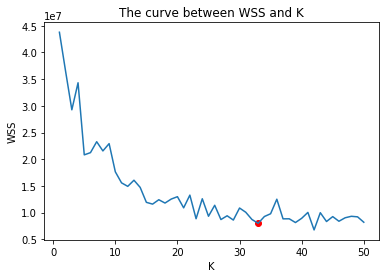

In [15]:
plt.plot(range(1,51),wck_sum)
plt.scatter(33,wck_sum[32],color = 'r')
plt.xlabel("K")
plt.ylabel("WSS")
plt.title("The curve between WSS and K")
plt.savefig("The curve between WSS and K")

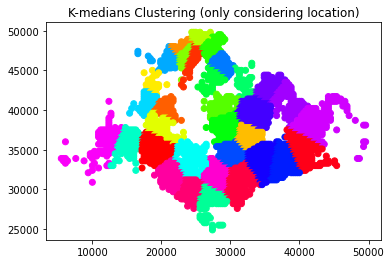

In [16]:
# Comparsion: K-medians Clustering (only considering location)
K =33
loca1 = loca[["x","y"]]
initial_medians = loca1.loc[0:K-1,:].values.tolist()
kmedians_instance = kmedians(loca1.values.tolist(),initial_medians)

kmedians_instance.process()
cluster_instances = kmedians_instance.get_clusters()
centers = np.array(kmedians_instance.get_medians())

clusters = np.zeros(len(loca1)) 
for k in range(K):
    clusters[cluster_instances[k]]=k 

plt.scatter(loca1['x'], loca1['y'], c=clusters,cmap='hsv')
# plt.scatter(centers[:, 0], centers[:, 1], c='black', marker='x', s=100)
plt.title("K-medians Clustering (only considering location)")
plt.savefig("K-medians Clustering (only considering location)")
plt.show()

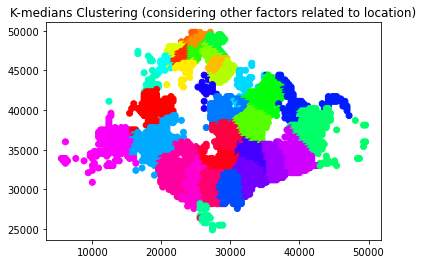

In [17]:
# K-medians Clustering (considering other factors related to location)
K = 33
initial_medians = loca.loc[0:K-1,:].values.tolist()
kmedians_instance = kmedians(loca.values.tolist(),initial_medians)

kmedians_instance.process()
cluster_instances = kmedians_instance.get_clusters()
centers = np.array(kmedians_instance.get_medians())

clusters = np.zeros(len(loca)) 
for k in range(K):
    clusters[cluster_instances[k]]=k 

# loca.loc[:,"clusters"] = clusters
    
plt.scatter(loca['x'], loca['y'], c=clusters,cmap='hsv')
# plt.scatter(centers[:, 0], centers[:, 1], c='black', marker='x', s=100)
plt.title("K-medians Clustering (considering other factors related to location)")
plt.savefig("K-medians Clustering (considering other factors related to location)")
plt.show()

In [18]:
df["cluster"] = df.apply(lambda row: clusters[loca_idx.index(row["CELL_ID"])],axis=1)
print(df.head())

   CELL_ID  DAYS  HOURS  SEQ  MOVE  TOTAL  HDB  PRIVATE  COMM      INDU  ...  \
0      252    30      9  105     0      1  0.0      0.0   0.0  0.468283  ...   
1      252    30     10  106     0      1  0.0      0.0   0.0  0.468283  ...   
2      252    30     11  107     0      1  0.0      0.0   0.0  0.468283  ...   
3      252    30     12  108     0      1  0.0      0.0   0.0  0.468283  ...   
4      252    30     13  109     1      1  0.0      0.0   0.0  0.468283  ...   

   WENDFREE        xmin        xmax        ymin        ymax  \
0         1  24238.0038  24538.0039  49656.3341  49956.3342   
1         1  24238.0038  24538.0039  49656.3341  49956.3342   
2         1  24238.0038  24538.0039  49656.3341  49956.3342   
3         1  24238.0038  24538.0039  49656.3341  49956.3342   
4         1  24238.0038  24538.0039  49656.3341  49956.3342   

           Longitude         Latitude            x            y  cluster  
0  103° 48' 3.099" E  1° 28' 0.138" N  24388.00385  49806.33415  

In [19]:
df_cell = df.copy()

In [20]:
# Set up the data set based on the cluster

temp1 = df[['SEQ','DAYS','HOURS','LABORFREE','WENDFREE']]
temp2 = df[['cluster','SEQ','MOVE','TOTAL','CYCLPATH','BUS_STOP','ROADINT','ROAD_LIN','RAIN']]
temp3 = df[['cluster','SEQ','HDB','PRIVATE','COMM','INDU','ENTROPY','MRTDIST','DISTCEN','TEMPO','x','y']]

df1 = temp1.drop_duplicates()
temp2 = temp2.groupby(['cluster','SEQ']).sum()
df2 = pd.DataFrame(temp2.values)
temp3 = temp3.groupby(['cluster','SEQ']).mean()
df3 = pd.DataFrame(temp3.values)

df2.columns = ['MOVE','TOTAL','CYCLPATH','BUS_STOP','ROADINT','ROAD_LIN','RAIN']
df3.columns = ['HDB','PRIVATE','COMM','INDU','ENTROPY','MRTDIST','DISTCEN','TEMPO','x','y']

df2_idx = temp2.index.tolist()
cluster = []
SEQ = []
for i in range(len(df2_idx)):
    cluster.append(df2_idx[i][0])
    SEQ.append(df2_idx[i][1])
df2['cluster'] = cluster
df2['SEQ'] = SEQ

df3_idx = temp3.index.tolist()
cluster = []
SEQ = []
for i in range(len(df3_idx)):
    cluster.append(df3_idx[i][0])
    SEQ.append(df3_idx[i][1])
df3['cluster'] = cluster
df3['SEQ'] = SEQ
    
df = pd.merge(pd.merge(df2,df3,on=['cluster','SEQ']),df1,on=['SEQ'])

df = df[['cluster','SEQ','DAYS','HOURS','LABORFREE','WENDFREE','MOVE','TOTAL','HDB','PRIVATE','COMM','INDU','CYCLPATH','BUS_STOP','ROADINT','ROAD_LIN','ENTROPY','MRTDIST','DISTCEN','RAIN','TEMPO','x','y']]
print(len(df))
print(df.head())

7122
   cluster  SEQ  DAYS  HOURS  LABORFREE  WENDFREE  MOVE  TOTAL       HDB  \
0      0.0    0    26      0          0         0  15.0  697.0  0.712015   
1      1.0    0    26      0          0         0   5.0  176.0  0.904898   
2      2.0    0    26      0          0         0   0.0   11.0  0.000000   
3      3.0    0    26      0          0         0   1.0   47.0  0.207568   
4      4.0    0    26      0          0         0   5.0  203.0  1.038677   

    PRIVATE  ...  BUS_STOP  ROADINT  ROAD_LIN   ENTROPY      MRTDIST  \
0  0.096832  ...     220.0   1675.0    2463.0  0.366020   952.622141   
1  0.012884  ...      61.0    467.0     729.0  0.362486  1264.747181   
2  0.000000  ...       6.0     12.0       6.0  0.236964  3308.140362   
3  0.000000  ...      23.0    100.0     115.0  0.284013  2069.604142   
4  0.020699  ...      76.0    466.0     638.0  0.445787  1140.910817   

        DISTCEN  RAIN      TEMPO             x             y  
0  18202.363072   0.0  26.378246  18978.47

In [21]:
df['SEQ'].value_counts()

213    33
53     33
97     33
93     33
89     33
       ..
122    33
118    33
203    33
214    31
215    29
Name: SEQ, Length: 216, dtype: int64

## Level Evaluation

In [22]:
# The Volumn of Use in Different Clusters

clu_mv_sum = df.groupby("cluster")["MOVE"].sum()
# print(clu_mv_sum)
clu_mv_sum.describe()
print(clu_mv_sum)

cluster
0.0     9951.0
1.0     3189.0
2.0       54.0
3.0      437.0
4.0     4604.0
5.0      880.0
6.0      498.0
7.0     2988.0
8.0     1926.0
9.0     3359.0
10.0    3222.0
11.0    9220.0
12.0     484.0
13.0    9845.0
14.0      61.0
15.0    1010.0
16.0     470.0
17.0     148.0
18.0    4665.0
19.0    1340.0
20.0    3215.0
21.0    1513.0
22.0      58.0
23.0    3267.0
24.0    4013.0
25.0    2380.0
26.0    4929.0
27.0    5006.0
28.0     984.0
29.0    1809.0
30.0    1218.0
31.0    1945.0
32.0    2604.0
Name: MOVE, dtype: float64


In [23]:
df_cell = df_cell[['CELL_ID','xmin','xmax','ymin','ymax','Longitude','Latitude','cluster']]
df_cell = df_cell.drop_duplicates()

,CELL_ID,xmin,xmax,ymin,ymax,Longitude,Latitude,cluster
0,252,24238.0038,24538.0039,49656.3341,49956.3342,"103° 48' 3.099"" E","1° 28' 0.138"" N",2.0
6,253,24538.0039,24838.0040,49656.3341,49956.3342,"103° 48' 12.804"" E","1° 28' 0.138"" N",2.0
20,254,24838.0040,25138.0041,49656.3341,49956.3342,"103° 48' 22.509"" E","1° 28' 0.138"" N",2.0
119,256,25438.0042,25738.0043,49656.3341,49956.3342,"103° 48' 41.919"" E","1° 28' 0.139"" N",3.0
131,261,26938.0047,27238.0048,49656.3341,49956.3342,"103° 49' 30.444"" E","1° 28' 0.139"" N",3.0
...,...,...,...,...,...,...,...,...
459815,14845,28138.0051,28438.0052,25356.3260,25656.3261,"103° 50' 9.263"" E","1° 14' 49.001"" N",14.0
459842,14846,28438.0052,28738.0053,25356.3260,25656.3261,"103° 50' 18.967"" E","1° 14' 49.001"" N",14.0
459863,14847,28738.0053,29038.0054,25356.3260,25656.3261,"103° 50' 28.671"" E","1° 14' 49.001"" N",14.0
459955,15022,27238.0048,27538.0049,25056.3259,25356.3260,"103° 49' 40.151"" E","1° 14' 39.234"" N",14.0


In [24]:
df_cell["clu_mv_sum"] = df_cell.apply(lambda row: clu_mv_sum[row["cluster"]],axis=1)


In [39]:
df_cell = df_cell.drop_duplicates()

In [40]:
df_cell.to_excel("df_cell.xlsx",index=False)

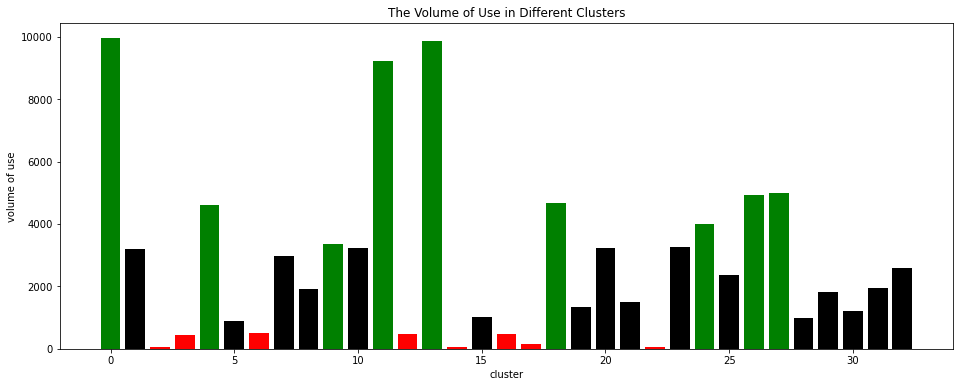

In [26]:
# Divide the clusters into three levels based on the volumn of use
color = []
level = []
for i in range(len(clu_mv_sum)):
    if clu_mv_sum[i] < 880:
        color.append('red')
        level.append('low')
    elif clu_mv_sum[i] < 3359:
        color.append('black')
        level.append('normal')
    else:
        color.append('green')
        level.append('high')
        
f, ax = plt.subplots(figsize = (16,6))
plt.bar(df["cluster"].unique(), clu_mv_sum, color=color)
plt.xlabel("cluster")
plt.ylabel("volume of use")
plt.title("The Volume of Use in Different Clusters")
plt.savefig("The Volume of Use in Different Clusters")
plt.show()

In [27]:
df["level"] = df.apply(lambda row: level[int(row["cluster"])], axis=1)
print(df.head())
df.to_excel("df_update.xlsx",index=False)

   cluster  SEQ  DAYS  HOURS  LABORFREE  WENDFREE  MOVE  TOTAL       HDB  \
0      0.0    0    26      0          0         0  15.0  697.0  0.712015   
1      1.0    0    26      0          0         0   5.0  176.0  0.904898   
2      2.0    0    26      0          0         0   0.0   11.0  0.000000   
3      3.0    0    26      0          0         0   1.0   47.0  0.207568   
4      4.0    0    26      0          0         0   5.0  203.0  1.038677   

    PRIVATE  ...  ROADINT  ROAD_LIN   ENTROPY      MRTDIST       DISTCEN  \
0  0.096832  ...   1675.0    2463.0  0.366020   952.622141  18202.363072   
1  0.012884  ...    467.0     729.0  0.362486  1264.747181  21914.595421   
2  0.000000  ...     12.0       6.0  0.236964  3308.140362  24461.745143   
3  0.000000  ...    100.0     115.0  0.284013  2069.604142  23130.868409   
4  0.020699  ...    466.0     638.0  0.445787  1140.910817  19096.555591   

   RAIN      TEMPO             x             y   level  
0   0.0  26.378246  18978.478

In [28]:
df_high = df[df['level']=='high']
df_high.groupby('DAYS')['MOVE'].mean()

DAYS
1     48.509259
2     27.495370
3     30.384259
4     21.509259
26    18.435185
27    16.953704
28    21.675926
29    35.365741
30    37.041667
Name: MOVE, dtype: float64

In [29]:
df_low = df[df['level']=='low']
df_low.groupby('DAYS')['MOVE'].mean()

DAYS
1     2.135417
2     1.281250
3     1.145833
4     1.123656
26    0.739583
27    0.958333
28    1.093750
29    1.645833
30    1.421875
Name: MOVE, dtype: float64

In [30]:
df_norm = df[df['level']=='normal']
df_norm.groupby('DAYS')['MOVE'].mean()

DAYS
1     15.575521
2      9.713542
3     10.695312
4      8.632812
26     5.619792
27     6.304688
28     7.184896
29    11.828125
30    11.658854
Name: MOVE, dtype: float64

In [31]:
np.mean(list(df_high.groupby("cluster")["MOVE"].sum()))

6176.888888888889

In [32]:
np.mean(list(df_norm.groupby("cluster")["MOVE"].sum()))

2093.125

In [33]:
np.mean(list(df_low.groupby("cluster")["MOVE"].sum()))

276.25

## Demand Prediction with LASSO

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

C:\Users\DELL\Miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 358361.83689818217, tolerance: 149.35727001783323
  positive)
C:\Users\DELL\Miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 363782.6217625781, tolerance: 151.96974366919292
  positive)
C:\Users\DELL\Miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 362812.52406955994, tolerance: 149.92151281765493
  positive)
C:\Users\DELL\Miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dual


In 10 -fold, when alpha= [5e-05, 0.0001, 0.0005, 0.001, 0.0015, 0.002, 0.01, 0.02, 0.05, 0.1, 0.2] ,
 the accuracy of each fold are  [0.5170240864561013, 0.5170244932163343, 0.5170268085716289, 0.5170273584920518, 0.5170253002477736, 0.5170206348955345, 0.5167031987308851, 0.5161142696811408, 0.5131085283912087, 0.5084915341933692, 0.5020454621802937]
Then, the best alpha is 0.001


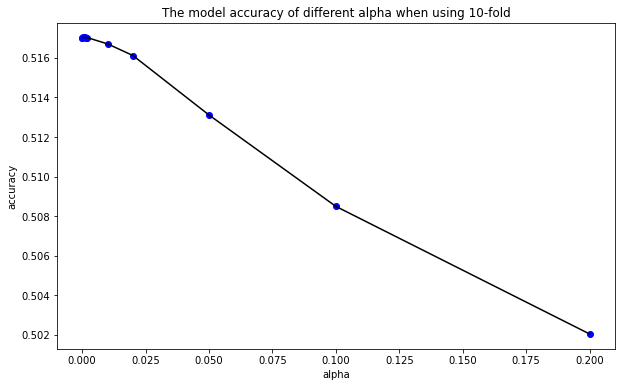


the Final Model:  -2.3306 + 0.8503 x HOURS + -2.1911 x HDB + -26.1945 x PRIVATE + -15.4331 x COMM + -11.3095 x INDU + 0.0008 x CYCLPATH + 0.1119 x BUS_STOP + 0.0193 x ROADINT + -0.0113 x ROAD_LIN + -3.9764 x ENTROPY + -0.0026 x MRTDIST + 0.0001 x DISTCEN + 10.441 x LABORFREE + 5.0048 x WENDFREE
r^2 on test data : 0.520077


C:\Users\DELL\Miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 401829.25522137294, tolerance: 168.43399189568706
  positive)


In [35]:
feature_cols = ['HOURS', 'HDB', 'PRIVATE','COMM','INDU','CYCLPATH','BUS_STOP','ROADINT','ROAD_LIN','ENTROPY','MRTDIST','DISTCEN','LABORFREE','WENDFREE']
X = df[feature_cols]
y = df['MOVE']

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) 

# use cross validation to train the Lasso Model
cv = 10
alpha = [0.00005,0.0001,0.0005,0.001,0.0015,0.002,0.01,0.02,0.05,0.1,0.2]

final_score = []
for i in range(len(alpha)):
    m_lasso = Lasso(alpha=alpha[i])
    scores = cross_val_score(m_lasso, X_train, y_train, cv=cv)
    final_score.append(np.mean(scores))
best_alpha = alpha[final_score.index(max(final_score))]
print("\nIn",str(cv),"-fold, when alpha=",alpha,",\n the accuracy of each fold are ",final_score)
print("Then, the best alpha is",best_alpha)

f, ax = plt.subplots(figsize = (10,6))
plt.plot(alpha, final_score, color='black')
plt.scatter(alpha, final_score, color='blue')
plt.xlabel("alpha")
plt.ylabel("accuracy")
plt.title("The model accuracy of different alpha when using "+str(cv)+"-fold")
plt.savefig("The model accuracy of different alpha when using "+str(cv)+"-fold")
plt.show()

model_final = Lasso(alpha=best_alpha)
y_pred_lasso = model_final.fit(X_train, y_train).predict(X_test)
r2_score_lasso = r2_score(y_test, y_pred_lasso)

print("\nthe Final Model: ",round(model_final.intercept_,4),
                        "+",round(model_final.coef_[0],4),"x",feature_cols[0],
                        "+",round(model_final.coef_[1],4),"x",feature_cols[1],
                        "+",round(model_final.coef_[2],4),"x",feature_cols[2],
                        "+",round(model_final.coef_[3],4),"x",feature_cols[3],
                        "+",round(model_final.coef_[4],4),"x",feature_cols[4],
                        "+",round(model_final.coef_[5],4),"x",feature_cols[5],
                        "+",round(model_final.coef_[6],4),"x",feature_cols[6],
                        "+",round(model_final.coef_[7],4),"x",feature_cols[7],
                        "+",round(model_final.coef_[8],4),"x",feature_cols[8],
                        "+",round(model_final.coef_[9],4),"x",feature_cols[9],
                        "+",round(model_final.coef_[10],4),"x",feature_cols[10],
                        "+",round(model_final.coef_[11],4),"x",feature_cols[11],
                        "+",round(model_final.coef_[12],4),"x",feature_cols[12],
                        "+",round(model_final.coef_[13],4),"x",feature_cols[13])
print("r^2 on test data : %f" % r2_score_lasso)

In [36]:
model_final = Lasso(alpha=0.2)
y_pred_lasso = model_final.fit(X_train, y_train).predict(X_test)
r2_score_lasso = r2_score(y_test, y_pred_lasso)

print("\nthe Final Model: ",round(model_final.intercept_,4),
                        "+",round(model_final.coef_[0],4),"x",feature_cols[0],
                        "+",round(model_final.coef_[1],4),"x",feature_cols[1],
                        "+",round(model_final.coef_[2],4),"x",feature_cols[2],
                        "+",round(model_final.coef_[3],4),"x",feature_cols[3],
                        "+",round(model_final.coef_[4],4),"x",feature_cols[4],
                        "+",round(model_final.coef_[5],4),"x",feature_cols[5],
                        "+",round(model_final.coef_[6],4),"x",feature_cols[6],
                        "+",round(model_final.coef_[7],4),"x",feature_cols[7],
                        "+",round(model_final.coef_[8],4),"x",feature_cols[8],
                        "+",round(model_final.coef_[9],4),"x",feature_cols[9],
                        "+",round(model_final.coef_[10],4),"x",feature_cols[10],
                        "+",round(model_final.coef_[11],4),"x",feature_cols[11],
                        "+",round(model_final.coef_[12],4),"x",feature_cols[12],
                        "+",round(model_final.coef_[13],4),"x",feature_cols[13])
print("r^2 on test data : %f" % r2_score_lasso)


the Final Model:  -12.551 + 0.8454 x HOURS + 0.0 x HDB + -0.0 x PRIVATE + -0.0 x COMM + -0.8344 x INDU + 0.0007 x CYCLPATH + 0.149 x BUS_STOP + -0.0047 x ROADINT + 0.0009 x ROAD_LIN + 0.0 x ENTROPY + -0.0026 x MRTDIST + 0.0004 x DISTCEN + 8.4356 x LABORFREE + 3.5575 x WENDFREE
r^2 on test data : 0.502403


C:\Users\DELL\Miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 144024.21001614083, tolerance: 168.43399189568706
  positive)


C:\Users\DELL\Miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 299413.85351934086, tolerance: 149.35727001783323
  positive)
C:\Users\DELL\Miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 301228.25604283164, tolerance: 151.96974366919292
  positive)
C:\Users\DELL\Miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 300965.3950149628, tolerance: 149.92151281765493
  positive)
C:\Users\DELL\Miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dual


In 10 -fold, when alpha= [5e-05, 0.0001, 0.0005, 0.001, 0.0015, 0.002, 0.01, 0.02, 0.05, 0.1, 0.2] ,
 the accuracy of each fold are  [0.5982145549333232, 0.5982157022129166, 0.5982222376159494, 0.5982280375664112, 0.5982316037422984, 0.5982330603350573, 0.5979050843838284, 0.5976696773936648, 0.5973338690352763, 0.597016076298604, 0.5953647051001276]
Then, the best alpha is 0.002


C:\Users\DELL\Miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 207665.80139795225, tolerance: 147.9799356362825
  positive)


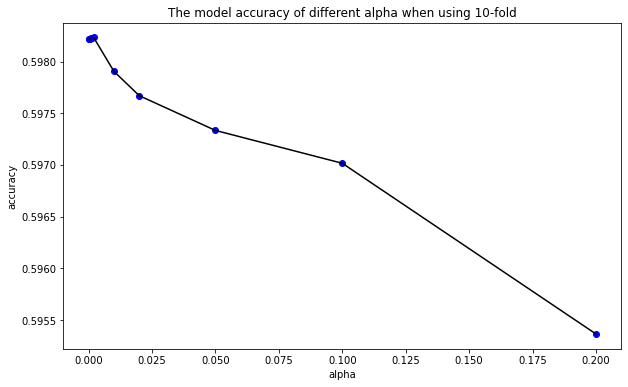


the Final Model:  -10.1721 + 0.8456 x HOURS + 0.5316 x HDB + -3.3803 x PRIVATE + -8.632 x COMM + -0.4907 x INDU + 0.0003 x CYCLPATH + -0.1017 x BUS_STOP + 0.0136 x ROADINT + -0.0039 x ROAD_LIN + 3.7397 x ENTROPY + -0.001 x MRTDIST + 0.0 x DISTCEN + 9.5066 x LABORFREE + 3.847 x WENDFREE + 0.0564 x TOTAL
r^2 on test data : 0.617375


C:\Users\DELL\Miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 331827.40550939046, tolerance: 168.43399189568706
  positive)


In [37]:
feature_cols = ['HOURS', 'HDB', 'PRIVATE','COMM','INDU','CYCLPATH','BUS_STOP','ROADINT','ROAD_LIN','ENTROPY','MRTDIST','DISTCEN','LABORFREE','WENDFREE','TOTAL']
X = df[feature_cols]
y = df['MOVE']

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) 

# use cross validation to train the Lasso Model
cv = 10
alpha = [0.00005,0.0001,0.0005,0.001,0.0015,0.002,0.01,0.02,0.05,0.1,0.2]

final_score = []
for i in range(len(alpha)):
    m_lasso = Lasso(alpha=alpha[i])
    scores = cross_val_score(m_lasso, X_train, y_train, cv=cv)
    final_score.append(np.mean(scores))
best_alpha = alpha[final_score.index(max(final_score))]
print("\nIn",str(cv),"-fold, when alpha=",alpha,",\n the accuracy of each fold are ",final_score)
print("Then, the best alpha is",best_alpha)

f, ax = plt.subplots(figsize = (10,6))
plt.plot(alpha, final_score, color='black')
plt.scatter(alpha, final_score, color='blue')
plt.xlabel("alpha")
plt.ylabel("accuracy")
plt.title("The model accuracy of different alpha when using "+str(cv)+"-fold")
plt.savefig("The model accuracy of different alpha when using "+str(cv)+"-fold")
plt.show()

model_final = Lasso(alpha=best_alpha)
y_pred_lasso = model_final.fit(X_train, y_train).predict(X_test)
r2_score_lasso = r2_score(y_test, y_pred_lasso)

print("\nthe Final Model: ",round(model_final.intercept_,4),
                        "+",round(model_final.coef_[0],4),"x",feature_cols[0],
                        "+",round(model_final.coef_[1],4),"x",feature_cols[1],
                        "+",round(model_final.coef_[2],4),"x",feature_cols[2],
                        "+",round(model_final.coef_[3],4),"x",feature_cols[3],
                        "+",round(model_final.coef_[4],4),"x",feature_cols[4],
                        "+",round(model_final.coef_[5],4),"x",feature_cols[5],
                        "+",round(model_final.coef_[6],4),"x",feature_cols[6],
                        "+",round(model_final.coef_[7],4),"x",feature_cols[7],
                        "+",round(model_final.coef_[8],4),"x",feature_cols[8],
                        "+",round(model_final.coef_[9],4),"x",feature_cols[9],
                        "+",round(model_final.coef_[10],4),"x",feature_cols[10],
                        "+",round(model_final.coef_[11],4),"x",feature_cols[11],
                        "+",round(model_final.coef_[12],4),"x",feature_cols[12],
                        "+",round(model_final.coef_[13],4),"x",feature_cols[13],
                        "+",round(model_final.coef_[14],4),"x",feature_cols[14])
print("r^2 on test data : %f" % r2_score_lasso)

In [38]:
model_final = Lasso(alpha=0.2)
y_pred_lasso = model_final.fit(X_train, y_train).predict(X_test)
r2_score_lasso = r2_score(y_test, y_pred_lasso)

print("\nthe Final Model: ",round(model_final.intercept_,4),
                        "+",round(model_final.coef_[0],4),"x",feature_cols[0],
                        "+",round(model_final.coef_[1],4),"x",feature_cols[1],
                        "+",round(model_final.coef_[2],4),"x",feature_cols[2],
                        "+",round(model_final.coef_[3],4),"x",feature_cols[3],
                        "+",round(model_final.coef_[4],4),"x",feature_cols[4],
                        "+",round(model_final.coef_[5],4),"x",feature_cols[5],
                        "+",round(model_final.coef_[6],4),"x",feature_cols[6],
                        "+",round(model_final.coef_[7],4),"x",feature_cols[7],
                        "+",round(model_final.coef_[8],4),"x",feature_cols[8],
                        "+",round(model_final.coef_[9],4),"x",feature_cols[9],
                        "+",round(model_final.coef_[10],4),"x",feature_cols[10],
                        "+",round(model_final.coef_[11],4),"x",feature_cols[11],
                        "+",round(model_final.coef_[12],4),"x",feature_cols[12],
                        "+",round(model_final.coef_[13],4),"x",feature_cols[13],
                        "+",round(model_final.coef_[14],4),"x",feature_cols[14])
print("r^2 on test data : %f" % r2_score_lasso)


the Final Model:  -9.7745 + 0.8434 x HOURS + 0.0 x HDB + -0.0 x PRIVATE + -0.0 x COMM + -0.0 x INDU + 0.0002 x CYCLPATH + -0.0914 x BUS_STOP + 0.012 x ROADINT + -0.0042 x ROAD_LIN + 0.0 x ENTROPY + -0.0012 x MRTDIST + 0.0001 x DISTCEN + 7.106 x LABORFREE + 2.3894 x WENDFREE + 0.0581 x TOTAL
r^2 on test data : 0.613591


C:\Users\DELL\Miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 236170.1879293489, tolerance: 168.43399189568706
  positive)
